<a href="https://colab.research.google.com/github/Naidala/CNN_medical_imaging/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Two-Class Classification**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# We repeat the tensor on three output,
# for this is the input our pre-trained network wants
my_train_images_pre = copy.deepcopy(my_train_images.repeat(repeats = 3, axis = 3))
my_train_labels_pre = copy.deepcopy(my_train_labels)

my_val_images_pre = copy.deepcopy(my_val_images.repeat(repeats = 3, axis = 3))
my_val_labels_pre = copy.deepcopy(my_val_labels)

test_images_pre = copy.deepcopy(test_images_2.repeat(repeats = 3, axis = 3))
test_labels_pre = copy.deepcopy(test_labels_2)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.6))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.0001),
              metrics = ['acc'])

# Layers Freezing
print('Number of total trainable weights: ', len(model.trainable_weights))
conv_base.trainable = False
print('Trainable weights after freezing the conv base: ', len(model.trainable_weights))

In [ ]:
EPOCH_TRAINED = 30      # not too many since it's already trained
history = model.fit_generator(
                      aug2.flow(my_train_images_pre,my_train_labels_pre,batch_size = BS),
                      validation_data = (my_val_images_pre,my_val_labels_pre),
                      steps_per_epoch = len(my_train_labels_pre) // BS,
                      epochs = EPOCH_TRAINED,
                      validation_steps = len(my_val_labels_pre) // BS,
                      shuffle = True)

In [ ]:
test_loss, test_acc = model.evaluate(test_images_pre, test_labels_pre)
print('test_acc: ', test_acc)

336/336 [==============================] - 0s 1ms/sample - loss: 0.2534 - acc: 0.8780
test_acc:  0.8779762


20


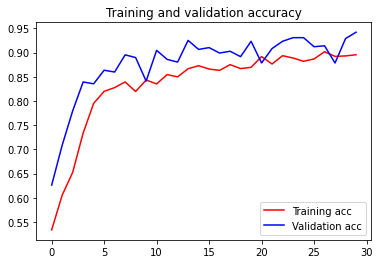

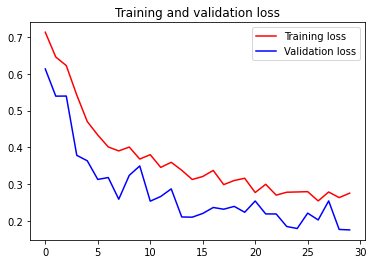

In [ ]:
best_epoch(history)
plot_acc_loss(history)

In [ ]:
#save_dir = "/content/drive/My Drive/CompIntProjects/2classes"
#if not os.path.exists(save_dir):
#  os.makedirs(save_dir)
#model.save(os.path.join(save_dir,'2classes_pre_trained.h5'))

In [ ]:
from tensorflow.keras.models import load_model
save_dir = "/content/drive/My Drive/CompIntProjects/2classes"
model_old = load_model(os.path.join(save_dir,"2classes_pre_trained.h5"))
test_loss, test_acc = model_old.evaluate(test_images_pre, test_labels_pre)
print('test_acc: ', test_acc)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
336/336 [==============================] - 1s 2ms/sample - loss: 0.2434 - acc: 0.9018
test_acc:  0.90178573


### **Fine-Tuning**

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block4_conv1' or 'block2_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.0001),
              metrics = ['acc'])

history = model.fit_generator(
            aug2.flow(my_train_images_pre,my_train_labels_pre,batch_size = BS),
            validation_data = (my_val_images_pre,my_val_labels_pre),
            steps_per_epoch = len(my_train_labels_pre) // BS,
            epochs = 10,
            validation_steps = len(my_val_labels_pre) // BS,
            shuffle = True)

In [ ]:
test_loss, test_acc = model.evaluate(test_images_pre, test_labels_pre)
print('test_acc: ', test_acc)

336/336 [==============================] - 0s 1ms/sample - loss: 0.2558 - acc: 0.9048
test_acc:  0.9047619


10


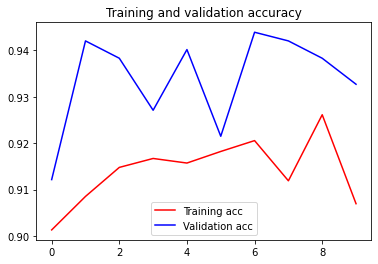

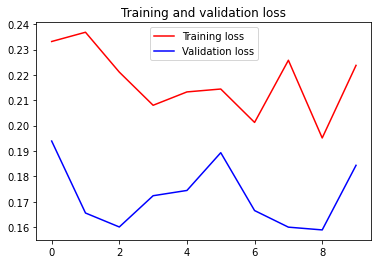

In [ ]:
best_epoch(history)
plot_acc_loss(history)

In [ ]:
#save_dir = "/content/drive/My Drive/CompIntProjects/2classes"
#if not os.path.exists(save_dir):
#  os.makedirs(save_dir)
#model.save(os.path.join(save_dir,'2classes_fine.h5'))

## **Four-Class Classification** (w/ Fine-Tuning)


In [ ]:
my_train_images_fine_4 = copy.deepcopy(my_train_images_4.repeat(repeats = 3, axis = 3))
my_val_images_fine_4 = copy.deepcopy(my_val_images_4.repeat(repeats = 3, axis = 3))
test_images_fine_4 = copy.deepcopy(test_images_4.repeat(repeats = 3, axis = 3))
my_train_labels_fine_4 = copy.deepcopy(my_train_labels_4)
my_val_labels_fine_4 = copy.deepcopy(my_val_labels_4)
test_labels_fine_4 = copy.deepcopy(test_labels_4)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

EPOCH_TRAINED = 40

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

conv_base.trainable = False

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block1_conv1' or 'block2_conv1' or 'block3_conv1' or 'block4_conv1' or 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(lr = 0.0001),
               metrics = ['acc'])


In [ ]:
EPOCH_AUG_4 = 40
history = model.fit_generator(
      aug4.flow(my_train_images_fine_4,my_train_labels_fine_4,batch_size = BS),
      validation_data = (my_val_images_fine_4,my_val_labels_fine_4),
      steps_per_epoch = len(my_train_labels_fine_4) // BS,
      epochs = EPOCH_AUG_4,
      validation_steps = len(my_val_labels_fine_4) // BS,
      shuffle = True)

336/336 [==============================] - 2s 5ms/sample - loss: 0.8033 - acc: 0.6131
test_acc:  0.6130952
12


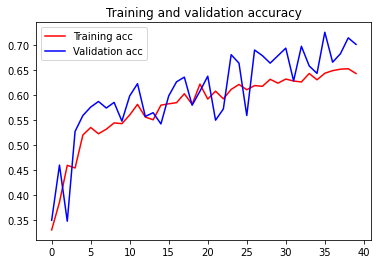

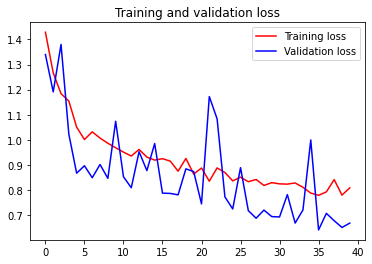

In [ ]:
test_loss, test_acc = model.evaluate(test_images_fine_4, test_labels_fine_4)
print('test_acc: ', test_acc)
best_epoch(history)
plot_acc_loss(history)

In [ ]:
#save_dir = "/content/drive/My Drive/CompIntProjects/4classes"
#if not os.path.exists(save_dir):
#  os.makedirs(save_dir)
#model.save(os.path.join(save_dir,'4classes_fine.h5'))

## A different approach: **Multi-Label Classification**

In [ ]:
EPOCHS = 75
INIT_LR = 1e-3
BS = 64
IMAGE_DIMS = (150, 150, 1)

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from google.colab import drive
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import copy


############################

def plot_acc_loss(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()


def best_epoch(history):
  x = history.history['val_loss']
  k = 3
  trend = []
  stop = 0
  for i in range(k,len(x)-k):
    if stop == 0:
      num = 0
      for j in range(-k, k+1):
        num = x[i+j] + num
      if len(trend) == 0:
        trend.append(num/(2*k+1))
      elif num/(2*k+1) <= trend[len(trend)-1] + 0.005:
        trend.append(num/(2*k+1))
      else:
        stop = 1
  print(2*k+len(trend))


############################
drive.mount('/content/drive/')
out_path = "/content/drive/My Drive/CompIntProjects/FinalProject2019/numpy data/"

def load_data():
  train_images = np.load(os.path.join(out_path,'train_tensor.npy'))
  train_labels = np.load(os.path.join(out_path,'train_labels.npy'))
  test_images = np.load(os.path.join(out_path,'public_test_tensor.npy'))
  test_labels = np.load(os.path.join(out_path,'public_test_labels.npy'))
  train_images = train_images.astype('float32') / 65535   #BW 16-bit
  train_images = train_images.reshape((len(train_images), 150, 150, 1))
  test_images = test_images.astype('float32') / 65535
  test_images = test_images.reshape((len(test_images), 150, 150, 1))
  return train_images, train_labels, test_images, test_labels


def abnormal_variables():
  train_images, train_labels, test_images, test_labels = load_data()
  train_images = train_images[1:len(train_images):2]
  train_labels = train_labels[1:len(train_labels):2]
  test_images = test_images[1:len(test_images):2]
  test_labels = test_labels[1:len(test_labels):2]
  return train_images, train_labels, test_images, test_labels


def labels_in_four(labels):
  label_words = []
  for i in range(0,len(labels)):
    if labels[i] == 1:
      label_words.append(('mass','good'))
    elif labels[i] == 2:
      label_words.append(('mass','bad'))
    elif labels[i] == 3:
      label_words.append(('calc','good'))
    else:
      label_words.append(('calc','bad'))
  return label_words


def augment(train_images, train_labels):
  np.random.seed(5)
  np.random.shuffle(train_images)
  np.random.seed(5)
  np.random.shuffle(train_labels)
  PERCENTAGE_VALIDATION = 0.2
  num_validation_samples = round(len(train_labels)*PERCENTAGE_VALIDATION)
  my_val_images = copy.deepcopy(train_images[:num_validation_samples])
  my_val_labels = copy.deepcopy(train_labels[:num_validation_samples])
  my_train_images = copy.deepcopy(train_images[num_validation_samples:])
  my_train_labels = copy.deepcopy(train_labels[num_validation_samples:])
  return my_train_images, my_train_labels, my_val_images, my_val_labels

In [ ]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense

class SmallerVGGNet:			# simpler versione of VGGNet
	def build(classes, finalAct="softmax"):
		model = Sequential()

		model.add(Conv2D(32, (3, 3), padding="same",input_shape=IMAGE_DIMS))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(3, 3)))
		model.add(Dropout(0.25))

		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(3, 3)))
		model.add(Dropout(0.25))

		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		model.add(Flatten())
		model.add(Dense(150))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.45))

		model.add(Dense(classes))
		model.add(Activation(finalAct))

		return model

In [ ]:
train_images_4, train_labels_4, test_images_4, test_labels_4 = abnormal_variables()
train_labels_4 = labels_in_four(train_labels_4)
test_labels_4 = labels_in_four(test_labels_4)

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()   # library to transform the word tuple (e.g. ('mass','bad'))
mlb.fit(train_labels_4)       # into a binary vector [1, 0, 0, 1]
mlb.fit(test_labels_4)
print(mlb.classes_)
train_labels_4 = mlb.transform(train_labels_4)
test_labels_4 = mlb.transform(test_labels_4)

my_train_images, my_train_labels, my_val_images, my_val_labels = augment(train_images_4, train_labels_4)

['bad' 'calc' 'good' 'mass']


In [ ]:
aug = ImageDataGenerator(rotation_range = 20,
                         shear_range = 0.3,
                         zoom_range = 0.5,
                         height_shift_range = 0.1,
                         width_shift_range = 0.1,
                         horizontal_flip = True,
                         vertical_flip = True,
                         fill_mode = 'nearest')

In [ ]:
from keras.optimizers import Adam
model = SmallerVGGNet.build(
	classes=len(mlb.classes_),
	finalAct="sigmoid")
opt = Adam(lr=INIT_LR)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

H = model.fit_generator(
	aug.flow(my_train_images,my_train_labels,batch_size = BS),
  validation_data = (my_val_images,my_val_labels),
	steps_per_epoch = len(my_train_labels) // BS,
	epochs=EPOCHS,
  verbose=1)

In [ ]:
test_loss, test_acc = model.evaluate(test_images_4, test_labels_4)
print('test_acc: ', test_acc)

336/336 [==============================] - 0s 258us/step
test_acc:  0.7395833134651184


In [ ]:
#save_dir = "/content/drive/My Drive/CompIntProjects/4classes"
#if not os.path.exists(save_dir):
#  os.makedirs(save_dir)
#model.save(os.path.join(save_dir,'4classes_multiLabel.h5'))

In [ ]:
from tensorflow.keras.models import load_model
save_dir = "/content/drive/My Drive/CompIntProjects/4classes"
model = load_model(os.path.join(save_dir,"4classes_multiLabel.h5"))
test_loss, test_acc = model.evaluate(test_images_4, test_labels_4)
print('test_acc: ', test_acc)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
336/336 [==============================] - 2s 5ms/sample - loss: 0.4942 - acc: 0.7574
test_acc:  0.75744045


In [ ]:
# confronto tra multiLabel
prediction = model.predict(test_images_4)
prediction = np.round(prediction)

count = 0
for i in range(0,len(test_labels_4)):
    if (test_labels_4[i] == prediction[i]).all():
      count = count +1
print(count/len(test_labels_4))  # 0.56 as in 0.75^2, since accuracy for binary classification
                                    # like bernoulli independent variable

0.5595238095238095
